In [16]:
library(rdydisstools)
loadpackages(c('doParallel', 'foreach', 'logging', 'glue', 'grid', 'gridExtra'))
nDatasets <- 5

In [ ]:
registerDoParallel(24)

foreach(i=1:nDatasets, .verbose=TRUE) %dopar% {

    datasetstring <- glue::glue("data/simsample{i}.RData")

    load(datasetstring)
    hexkey <- read.csv('sourcedata/hexkey.csv', header=FALSE)[1:100]
    hexkey <- which(hexkey==-1)
    rcdf <- rdydisstools::reverseCode(df[,1:100], hexkey, max=7)
    rcdf <- cbind(rcdf, df[101:102])
    
    ls <- dispatchRQ1(df, what='longstring', from=-3, to=3, by=.1, i=i)
    eo <- dispatchRQ1(rcdf, what="evenodd", factors=rep(10,10), from=-3, to=3, by=.1, i=i)
    md <- dispatchRQ1(rcdf, what="mahad", from=-3, to=3, by=.1, i=i)

    lsJPlot <- plot(ls$informedness, i)
    lsCRMetricPlot <- plot(ls$metric, 'longstring', i)
    eoJPlot <- plot(eo$informedness, i)
    eoCRMetricPlot <- plot(eo$metric, 'evenodd', i)
    mdJPlot <- plot(md$informedness, i)
    mdCRMetricPlot <- plot(md$metric, "Mahalanobis", i)
    
    
    list(lsJPlot, lsCRMetricPlot, eoJPlot, eoCRMetricPlot, mdJPlot, mdCRMetricPlot)
}

In [29]:
sdRocer

function (metric, truth, from, to, by) 
{
    xbar <- mean(metric)
    SD <- sd(metric)
    range <- seq(from = from, to = to, by = by)
    rangeLength <- length(range)
    predictions <- matrix(nrow = nrow(df), ncol = rangeLength)
    for (i in 1:rangeLength) {
        cut <- xbar + (range[i] * SD)
        predictions[, i] <- as.numeric(metric > cut)
    }
    colnames(predictions) <- range
    resultMatrices <- vector("list", ncol(predictions))
    for (i in 1:ncol(predictions)) {
        resultMatrices[[i]] <- confusionMatrix(predictions[, 
            i], truth)
    }
    return(list(results = resultMatrices, range = range, metric = metric))
}
<bytecode: 0x1473fe0>
<environment: namespace:rdydisstools>

In [44]:
class(df$crModel)

[1] "factor"

In [45]:
class(metricData$crModel)

[1] "numeric"

In [70]:
test <- informednessData
attr(test, 'class') <- c('informedness', 'data.frame')
class(test)

[1] "informedness" "data.frame"

In [71]:
plot.informedness <- function(x, i) {
    ggplot(x, aes(x=range, y=informedness)) + 
    geom_line() + geom_point() + 
    ggtitle(glue::glue('Figure {i}.1: Informedness by cut score')) +
    theme(legend.position="bottom", text=element_text(family="Times New Roman", size=12))
}

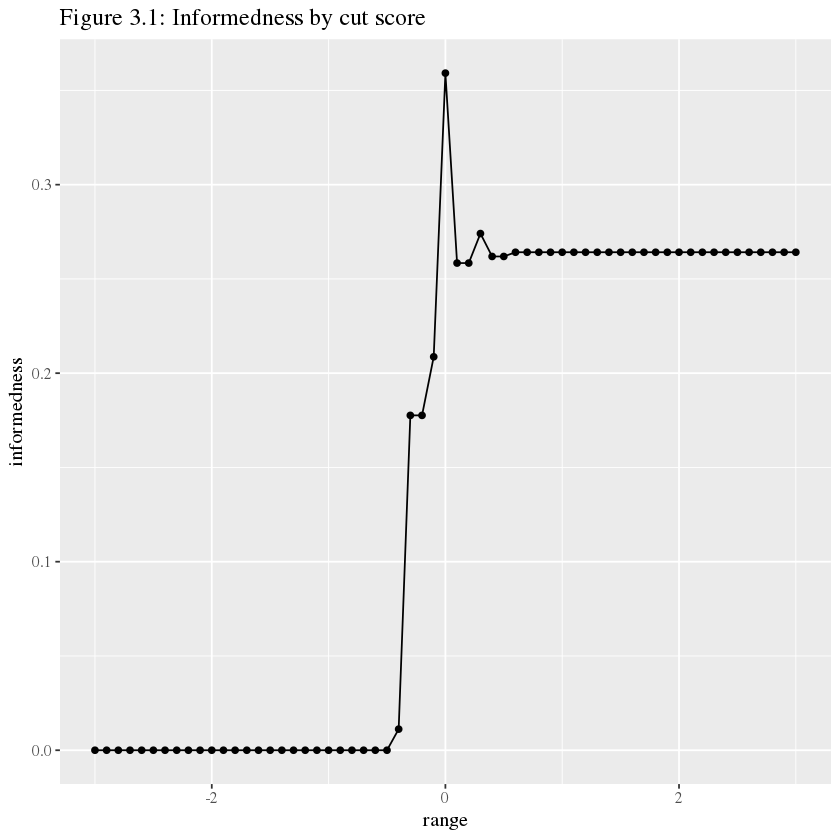

In [72]:
plot(test, 3)

In [61]:
methods('plot')

 [1] plot,ANY-method        plot,color-method      plot.acf*             
 [4] plot.ACF*              plot.AUC*              plot.augPred*         
 [7] plot.compareFits*      plot.data.frame*       plot.decomposed.ts*   
[10] plot.default           plot.dendrogram*       plot.density*         
[13] plot.ecdf              plot.factor*           plot.formula*         
[16] plot.function          plot.ggplot*           plot.gls*             
[19] plot.gtable*           plot.hclust*           plot.histogram*       
[22] plot.HoltWinters*      plot.informedness      plot.intervals.lmList*
[25] plot.irt*              plot.isoreg*           plot.lm*              
[28] plot.lme*              plot.lmList*           plot.medpolish*       
[31] plot.mlm*              plot.nffGroupedData*   plot.nfnGroupedData*  
[34] plot.nls*              plot.nmGroupedData*    plot.pdMat*           
[37] plot.poly*             plot.poly.parallel*    plot.ppr*             
[40] plot.prcomp*           plot.princ

In [62]:
plot.stepfun

function (x, xval, xlim, ylim = range(c(y, Fn.kn)), xlab = "x", 
    ylab = "f(x)", main = NULL, add = FALSE, verticals = TRUE, 
    do.points = (n < 1000), pch = par("pch"), col = par("col"), 
    col.points = col, cex.points = par("cex"), col.hor = col, 
    col.vert = col, lty = par("lty"), lwd = par("lwd"), ...) 
{
    if (!is.stepfun(x)) {
        if (is.numeric(x)) {
            sarg <- substitute(x)
            x <- ecdf(x)
            attr(x, "call") <- call("ecdf", sarg)
        }
        else stop("'plot.stepfun' called with wrong type of argument 'x'")
    }
    if (missing(main)) 
        main <- {
            cl <- attr(x, "call")
            deparse(if (!is.null(cl)) 
                cl
            else sys.call())
        }
    knF <- knots(x)
    xval <- if (missing(xval)) 
        knF
    else sort(xval)
    if (missing(xlim)) {
        rx <- range(xval)
        dr <- if (length(xval) > 1L) 
            max(0.08 * diff(rx), median(diff(xval)))
        else abs(xval)/16
        xlim <- rx + dr * c(-1, 1)
    }
    else dr <- diff(xlim)
    xval <- xval[xlim[1L] - dr <= xval & xval <= xlim[2L] + dr]
    ti <- c(xlim[1L] - dr, xval, xlim[2L] + dr)
    ti.l <- ti[-length(ti)]
    ti.r <- ti[-1L]
    y <- x(0.5 * (ti.l + ti.r))
    n <- length(y)
    Fn.kn <- x(xval)
    dev.hold()
    on.exit(dev.flush())
    if (add) 
        segments(ti.l, y, ti.r, y, col = col.hor, lty = lty, 
            lwd = lwd, ...)
    else {
        if (missing(ylim)) 
            ylim <- range(c(y, Fn.kn))
        plot(NA, NA, type = "n", xlim = xlim, ylim = ylim, xlab = xlab, 
            ylab = ylab, main = main, ...)
        segments(ti.l, y, ti.r, y, col = col.hor, lty = lty, 
            lwd = lwd)
    }
    if (do.points) 
        points(xval, Fn.kn, pch = pch, col = col.points, cex = cex.points)
    if (verticals) 
        segments(xval, y[-n], xval, y[-1L], col = col.vert, lty = lty, 
            lwd = lwd)
    invisible(list(t = ti, y = y))
}
<bytecode: 0x5500a50>
<environment: namespace:stats>